### Pathway Evaluation:

The goal is to analyse the behaviour of the different pathway when they are fed with the chosen substrate NAM and Glucose. They are judged by their maximum production and the maximum MA flux in relation to the biomass growth rate.

## Simulating pathways and visualizing results
The pathways are one by one simulated with the set medium flux. They are analyzed for NMN production in relation to the biomass growth. The phenotypic phase planes show the relation of the carbon yield for NMN on NAM as a function of the growth rate.

In [9]:
models = [(NAM_model,'NAM'),(NA_model,'NA'),(NR_model,'NR')]

General maximum biomass growth 14.482589667309739


,NAM,NA,NR
max carbon yield,1.000000,0.820113,7.710270
max production,10.909091,4.473346,119.158717


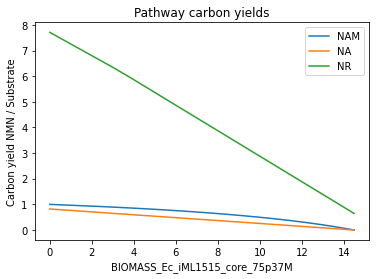

In [11]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
import pandas as pd

model.medium = medium
model.objective = model.reactions.get_by_id('BIOMASS_Ec_iML1515_core_75p37M')

df_yields = pd.DataFrame()
df_max = pd.DataFrame(index=['max carbon yield','max production'])
max_growth = model.slim_optimize()
print('General maximum biomass growth',max_growth)

for pairing in models:
    pathway_model = pairing[0]
    with pathway_model:
        pathway_model.medium = medium
        pathway_model.objective = pathway_model.reactions.get_by_id('EX_nmn_e')
        ppp = production_envelope(pathway_model,
                    reactions='BIOMASS_Ec_iML1515_core_75p37M',
                    objective='EX_nmn_e')
        df_yields[pairing[1]]=ppp.carbon_yield_maximum
        df_max[pairing[1]]=[ppp.carbon_yield_maximum.max(),ppp.flux_maximum.max()]

display(df_max)
#display (df_yields)

df_yields.plot
df_yields['BIOMASS_Ec_iML1515_core_75p37M'] = ppp.BIOMASS_Ec_iML1515_core_75p37M
Pathway_carbon_yields = df_yields.plot(x='BIOMASS_Ec_iML1515_core_75p37M', y=[pairing[1] for pairing in models], title='Pathway carbon yields').set_ylabel('Carbon yield NMN / Substrate')
